Install simpy

In [ ]:
!pip3 install SimPy



code

# Queue M/M/1/B = n
  + Time between successive arrivals is exponentially distributed
  + Service times are exponentially distributed
  + One server
  + n buffers = 1 service + (n - 1) waiting
  + After n, all arriving jobs are lost


---

# List service and outcome
  + List service:
    + job process
  + List outcome:
    + Probability done job
    + Mean of waiting time
    + Mean of service time


---

# Metrics
  + Outcome is probability done job => Metrics are rate of arrive job, rate of service, size of buffer, number of job.
  + Outcome is mean of waiting time => Metric rate of service, size of buffer.
  + Outcome is mean of service time => Metric rate of service.


---


# Parameter of workload 
  + Rate of arrive job
  + Number of job

---


# Parameter of system
  + Rate of service 
  + Size of buffer
  + Numbers of server

---
# Factor
  + Rate of arrive job
    + Level 1: Slow = 10 jps
    + Level 2: Medium = 50 jps
    + Level 3: Fast = 100 jps
    + Level 4: Super fast = 300 jps
  + Rate of service 
    + Level 1: Slow = 10 jps
    + Level 2: Medium = 50 jps
    + Level 3: Fast = 200 jps
  + Size of buffer 
    + Level 1: Small 20 slot
    + Level 2: Medium 100 slot
    + Level 3: Big 200 slot
  + Numbers of job
    + Level 1: Little = 100 job
    + Level 2: Medium = 500 job
    + Level 3: Many = 1500 job
    + Level 4: Many Many = 5000 job

In [ ]:
import simpy
import random

class myQueue:
  def __init__(self, size):
    self.size = size
    self.slot = 0
    self.workDone = 0
    self.workLoss = 0
    self.totalWork = 0
    self.totalServiceTime = 0
    self.sumOfWaitingTime = 0
    self.timeServerFree = 0
  def increate(self):
    self.slot += 1
  def decrease(self):
    self.slot -= 1
  def getSize(self):
    return self.size
  def getSlot(self):
    return self.slot
  def isFull(self):
    if self.slot == self.size :
      return 1
    else:
      return 0

def poisonArrive(rate):
  return random.expovariate(rate)

def timeService(rate):
  return random.expovariate(rate)

def simulate(env, id, bcs, arriveTime, queue , rateService):
 # print("Slot " + str(queue.getSlot()) + "Size " + str(queue.getSize()))
  yield env.timeout(arriveTime)
  if queue.isFull() == 0:
    t1 = env.now
    queue.increate()
    queue.workDone += 1
    queue.totalWork += 1
    print(f'Process {id:3d} arrive at time {env.now:5.2f} Queue {queue.getSlot()}/{queue.getSize()}')
    with bcs.request() as req:
      yield req
      t3 = timeService(rateService)
      queue.totalServiceTime += t3
      yield env.timeout(t3)
      t2 = env.now
      queue.decrease()
      queue.sumOfWaitingTime += abs(t2-t1-t3)
      print(f'Terminate process {id:3d} at time {env.now:5.2f} [TimeService = {t3:3f}] [WaitingTime = {abs((t2-t1-t3)):3f}] Queue {queue.getSlot()}/{queue.getSize()}')
  else:
    queue.workLoss += 1
    queue.totalWork += 1
    print(f'Process {id:3d} arrive at time {env.now:5.2f} Queue Full!')
def run(numProcess, rate , sizeOfQueue, rateService):
  A = myQueue(sizeOfQueue)
  env = simpy.Environment()
  bcs = simpy.Resource(env, capacity=1)
  timeline = 0;
  for i in range(numProcess):
    interarrival = random.expovariate(rate)
    timeline += interarrival
    env.process(simulate(env, i, bcs, timeline, A, rateService))
  env.run()
  p = rate / rateService
  #print("Arrival rate = " + str(rate))
 # print("Service rate = " + str(rateService))
 # print("Gateway Utilization = " + str(p))
 # print("Mean number of jobs in the system = " + str(p/(1-p)))
 # print("Mean time spent in the gateway = " + str((1/rateService)/(1-p)))
 # print("Probability of buffer overflow = " + str(pow(p,sizeOfQueue)))
  print("Total time service = " + str(A.totalServiceTime))
  print("Sum of waiting time = " + str(A.sumOfWaitingTime))
  print("Mean service time = " + str(A.totalServiceTime / A.workDone))
  print("Mean waiting time = " + str(A.sumOfWaitingTime / A.workDone))
  print("Numbers jobs loss = " + str(A.workLoss))
  print("Numbers jobs done = " + str(A.workDone))
  print("Probability drop job = " + str((A.workLoss / A.totalWork)*100) + "%" )
  print("Probability done job = " + str((A.workDone / A.totalWork)*100) + "%")

#thach
def simulate_rate(env, id, bcs, arriveTime, queue , rateService):
 # print("Slot " + str(queue.getSlot()) + "Size " + str(queue.getSize()))
  yield env.timeout(arriveTime)
  if queue.isFull() == 0:
    t1 = env.now
    queue.increate()
    queue.workDone += 1
    queue.totalWork += 1
    with bcs.request() as req:
      yield req
      t3 = timeService(rateService)
      queue.totalServiceTime += t3
      yield env.timeout(t3)
      t2 = env.now
      queue.decrease()
      queue.sumOfWaitingTime += abs(t2-t1-t3)
  else:
    queue.workLoss += 1
    queue.totalWork += 1

def run_rate(numProcess, rate , sizeOfQueue, rateService):
  A = myQueue(sizeOfQueue)
  env = simpy.Environment()
  bcs = simpy.Resource(env, capacity=1)
  timeline = 0;
  for i in range(numProcess):
    interarrival = random.expovariate(rate)
    timeline += interarrival
    env.process(simulate_rate(env, i, bcs, timeline, A, rateService))
  env.run()
  p = rate / rateService
  work_loss.append((A.workLoss / A.totalWork)*100)
  work_done.append((A.workDone / A.totalWork)*100)
  waiting_time.append(A.sumOfWaitingTime / A.workDone)
  service_time.append(A.totalServiceTime / A.workDone)
  # print("Total time service = " + str(A.totalServiceTime))
  # print("Sum of waiting time = " + str(A.sumOfWaitingTime))
  # print("Mean service time = " + str(A.totalServiceTime / A.workDone))
  # print("Mean waiting time = " + str(A.sumOfWaitingTime / A.workDone))
  # print("Numbers jobs loss = " + str(A.workLoss))
  # print("Numbers jobs done = " + str(A.workDone))
  # print("Probability drop job = " + str((A.workLoss / A.totalWork)*100) + "%" )
  # print("Probability done job = " + str((A.workDone / A.totalWork)*100) + "%")

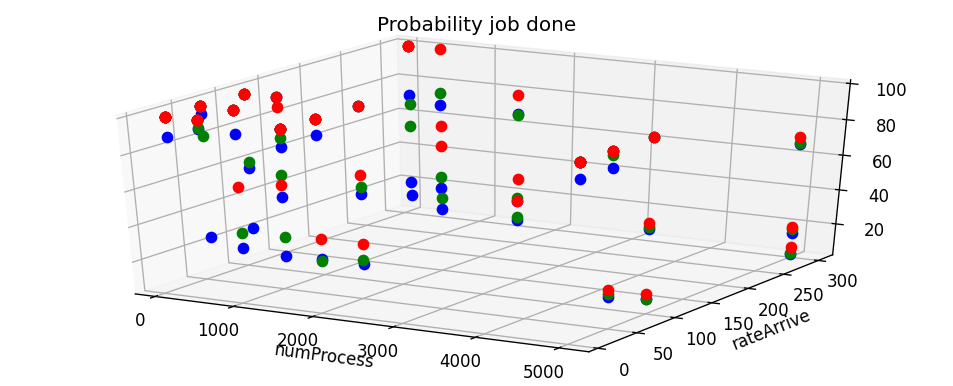

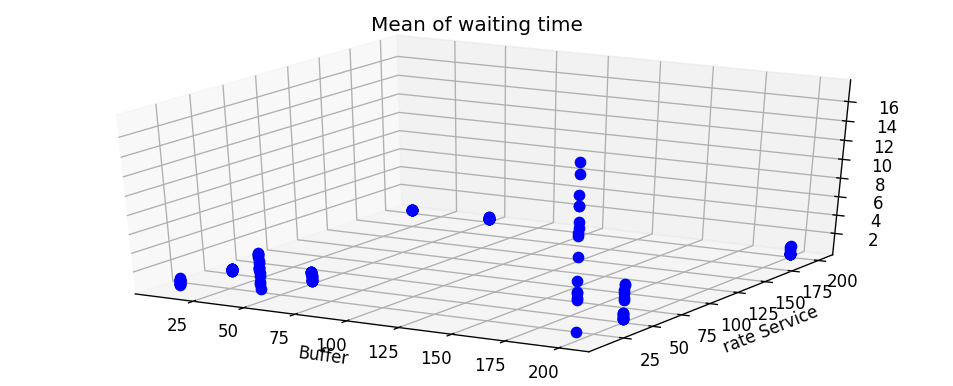

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

numProcess = [100, 500, 1500, 5000]
rateArrive = [10, 50, 100, 300]
buffer = [10, 50, 200]
rateService = [10, 50, 200]
work_loss = []
work_done = []
waiting_time = []
service_time = []
x = []
y = []
z = []
c = []
done = []
temp1 = []
temp2 = []
temp3 = []
temp4 = []
wait =[]
service = []
for k in buffer:
  for l in rateService:
    for i in numProcess:
      for j in rateArrive:
        temp1.append(i)
        temp2.append(j)
        temp3.append(k)
        temp4.append(l)
        run_rate(i,j,k,l)
  done.append(work_done)
  x.append(temp1)
  y.append(temp2)
  z.append(temp3)
  c.append(temp4)
  wait.append(waiting_time)
  service.append(service_time)
  temp1 = []
  temp2 = []
  temp3 = []
  temp4 = []
  waiting_time =[]
  work_done = []
  service_time = []
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True, dpi=120)

ax1 = plt.axes(projection='3d')
ax1.set_title("Probability job done")
ax1.plot3D(x[0], y[0], done[0], 'bo')
ax1.plot3D(x[1], y[1], done[1], 'go')
ax1.plot3D(x[2], y[2], done[2], 'ro')
plt.xlabel('numProcess')
plt.ylabel('rateArrive')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True, dpi=120)
ax1 = plt.axes(projection='3d')
ax1.set_title("Mean of waiting time")
ax1.plot3D(z[0], c[0], wait[0], 'bo')
ax1.plot3D(z[1], c[1], wait[1], 'bo')
ax1.plot3D(z[2], c[2], wait[2], 'bo')
plt.xlabel('Buffer')
plt.ylabel('rate Service')
plt.show()


# Result
 + Size buffer strongly impact => Probability done job
 + Size buffer weakly impact => Probability done job 
 + Size buffer weakly impact => Probability done job 


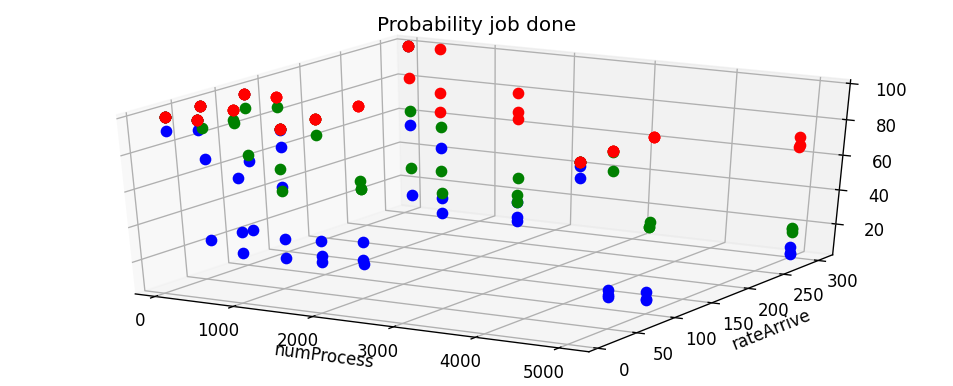

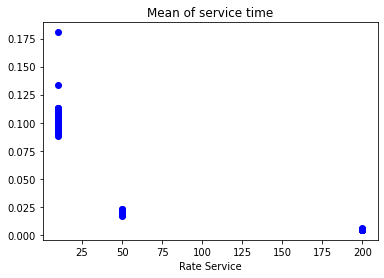

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

numProcess = [100, 500, 1500, 5000]
rateArrive = [10, 50, 100, 300]
buffer = [10, 50, 200]
rateService = [10, 50, 200]
work_loss = []
work_done = []
waiting_time = []
service_time = []
x = []
y = []
z = []
c = []
done = []
temp1 = []
temp2 = []
temp3 = []
temp4 = []
wait =[]
service = []
for l in rateService:
  for k in buffer:
    for i in numProcess:
      for j in rateArrive:
        temp1.append(i)
        temp2.append(j)
        temp3.append(k)
        temp4.append(l)
        run_rate(i,j,k,l)
  done.append(work_done)
  x.append(temp1)
  y.append(temp2)
  z.append(temp3)
  c.append(temp4)
  wait.append(waiting_time)
  service.append(service_time)
  temp1 = []
  temp2 = []
  temp3 = []
  temp4 = []
  waiting_time =[]
  work_done = []
  service_time = []
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True, dpi=120)

ax1 = plt.axes(projection='3d')
ax1.set_title("Probability job done")
ax1.plot3D(x[0], y[0], done[0], 'bo')
ax1.plot3D(x[1], y[1], done[1], 'go')
ax1.plot3D(x[2], y[2], done[2], 'ro')
plt.xlabel('numProcess')
plt.ylabel('rateArrive')
plt.show()


plt.title("Mean of service time")
plt.plot(c[0],  service[0], 'bo')
plt.plot(c[1], service[1], 'bo')
plt.plot(c[2],  service[2], 'bo')
plt.xlabel('Rate Service')
plt.show()